<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC12x**

# **Statistics**

## **Part 1. Bayes Theorem**

Bayes Thoerem은 사전확률에서 정보가 업데이트됨에 따라 사후확률이 어떻게 변화하는지를 나타냅니다. 

다음의 문제에 대해 Bayes Thoerem을 활용하여 사후확률을 구해보세요.

> 여러분은 가게에서 2개의 사탕팩(A, B)을 구매하였습니다. A팩에는 7개의 딸기맛, 3개의 사과맛 사탕이 들어있고, B팩에는 5개의 딸기맛, 5개의 사과맛 사탕이 들어있었습니다. 해당 사탕들을 모두 섞은 후 1개를 뽑았더니 딸기맛이었을 때, 해당 사탕이 A팩에 있었던 사탕이었을 확률은 얼마일까요?





##### **Q1. 사후확률을 반올림하여 소수점 둘째 자리까지 구한 후, 사전확률과 사후확률 결과를 (사전확률, 사후확률)의 형태로 쓰세요.**

In [ ]:
# 사전확률
A = 1/2
not_A = 1/2

strawberry_for_A = 7/10
strawberry_for_B = 5/10

# 사후확률
posterior = (strawberry_for_A * A) / ((strawberry_for_A * A) + (strawberry_for_B * not_A))

A, round(posterior, 2)

(0.5, 0.58)

---

## **Part 2. 큰 수의 법칙 & 신뢰 구간**

> **Part 2, Part 3에서 여러분은 가상의 마케팅 데이터를 활용할 것입니다.**

#### 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다루고 있으며, 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Country - 고객의 국적
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)

### **2-1. 데이터셋 살펴보기**

- 데이터셋을 데이터프레임 형태로 불러오세요.
- `Income` column 이름 앞뒤의 공백을 제거하세요.
- 데이터셋의 결측치를 살펴보고, 있다면 제거하고 인덱스를 재설정하세요.
- `Income`의 데이터타입을 `int`로 변경하세요.
  - 필요시 다음의 코드를 활용해보세요.
  

  ```python
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))
  
    df['Income'] = li
  ```

- `Income`의 이상치를 제거하세요.
  - 다음의 코드를 통해 `Income`의 분포를 비교해보세요.

  ```python
  plt.hist(df['Income']);

  plt.hist(df.loc[df['Income'] < 120000, 'Income']);
  ```

  - `Income`이 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.

- 위의 전처리 과정을 완료한 데이터프레임을 `df_final` 변수로 저장하세요.

##### **Q2. `df_final`의 행의 개수를 쓰세요.**

In [ ]:
# 아래의 코드를 실행해 주세요. 업그레이드 완료 후에는 런타임을 재시작해야 합니다. 
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = '/content/sc_12_data.csv'

data = pd.read_csv(url)

data.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,...,104,379,111,189,218,1,4,6,1,0
1,1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,...,5,64,7,0,37,1,7,7,5,0
2,2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,...,11,59,15,2,30,1,3,5,2,0
3,3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,...,0,1,0,0,0,1,1,2,7,0
4,4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,...,16,24,11,0,34,2,3,2,7,0


In [ ]:
# Income 컬럼 이름 앞 뒤에 띄어쓰기 포함되어 있음을 확인
data.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Country', 'Education',
       'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [ ]:
# Income 이름 타 column과 형식 동일화
data.rename(columns={' Income ': 'Income'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2140 non-null   int64 
 1   ID                 2140 non-null   int64 
 2   Year_Birth         2140 non-null   int64 
 3   Country            2140 non-null   object
 4   Education          2140 non-null   object
 5   Marital_Status     2140 non-null   object
 6   Income             2119 non-null   object
 7   Kidhome            2140 non-null   int64 
 8   Teenhome           2140 non-null   int64 
 9   Dt_Customer        2140 non-null   object
 10  Recency            2140 non-null   int64 
 11  MntWines           2140 non-null   int64 
 12  MntFruits          2140 non-null   int64 
 13  MntMeatProducts    2140 non-null   int64 
 14  MntFishProducts    2140 non-null   int64 
 15  MntSweetProducts   2140 non-null   int64 
 16  MntGoldProds       2140 non-null   int64 


In [ ]:
# 결측치 확인
data.isnull().sum()

Unnamed: 0            0
ID                    0
Year_Birth            0
Country               0
Education             0
Marital_Status        0
Income               21
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
dtype: int64

In [ ]:
# 결측치 제거 및 인덱스 재정렬
data = data.dropna().reset_index(drop=True)

# 결측치 제거 후 확인
data.isnull().sum()

Unnamed: 0           0
ID                   0
Year_Birth           0
Country              0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
dtype: int64

In [ ]:
# Income - int 형태로 변경
import re

def cleaning(df):
  li = []
  for row in df['Income']:
    splited = row.split('.')
    result = re.sub('[^0-9]','', splited[0])
    li.append(int(result))
  
  df['Income'] = li

In [ ]:
cleaned_data = data.copy()

cleaning(cleaned_data)

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2119 non-null   int64 
 1   ID                 2119 non-null   int64 
 2   Year_Birth         2119 non-null   int64 
 3   Country            2119 non-null   object
 4   Education          2119 non-null   object
 5   Marital_Status     2119 non-null   object
 6   Income             2119 non-null   int64 
 7   Kidhome            2119 non-null   int64 
 8   Teenhome           2119 non-null   int64 
 9   Dt_Customer        2119 non-null   object
 10  Recency            2119 non-null   int64 
 11  MntWines           2119 non-null   int64 
 12  MntFruits          2119 non-null   int64 
 13  MntMeatProducts    2119 non-null   int64 
 14  MntFishProducts    2119 non-null   int64 
 15  MntSweetProducts   2119 non-null   int64 
 16  MntGoldProds       2119 non-null   int64 


In [ ]:
cleaned_data.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,1826,1970,SP,Graduation,Divorced,84835,0,0,6/16/14,...,104,379,111,189,218,1,4,6,1,0
1,1,1,1961,CA,Graduation,Single,57091,0,0,6/15/14,...,5,64,7,0,37,1,7,7,5,0
2,2,10476,1958,US,Graduation,Married,67267,0,1,5/13/14,...,11,59,15,2,30,1,3,5,2,0
3,3,1386,1967,AUS,Graduation,Together,32474,1,1,5/11/14,...,0,1,0,0,0,1,1,2,7,0
4,4,5371,1989,SP,Graduation,Single,21474,1,0,4/8/14,...,16,24,11,0,34,2,3,2,7,0


In [ ]:
data.head()

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,...,104,379,111,189,218,1,4,6,1,0
1,1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,...,5,64,7,0,37,1,7,7,5,0
2,2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,...,11,59,15,2,30,1,3,5,2,0
3,3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,...,0,1,0,0,0,1,1,2,7,0
4,4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,...,16,24,11,0,34,2,3,2,7,0


In [ ]:
# Income 통계치 확인
cleaned_data.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.00000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000
mean,1089.656914,5581.754129,1969.009438,52451.883908,0.408683,0.46673,48.712600,308.960831,27.010854,171.006607,38.649363,27.810760,44.518169,2.289759,4.096744,5.845682,5.286456,0.008966
std,630.430791,3251.708192,12.044688,25475.264664,0.491707,0.49901,28.865354,339.032591,40.279833,227.144041,55.227423,41.607019,51.846431,1.899516,2.717339,3.259224,2.447863,0.094288
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,542.500000,2812.500000,1959.000000,35196.000000,0.000000,0.00000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,3.000000,3.000000,0.000000
50%,1087.000000,5454.000000,1970.000000,51651.000000,0.000000,0.00000,49.000000,180.000000,8.000000,69.000000,13.000000,9.000000,25.000000,2.000000,4.000000,5.000000,6.000000,0.000000
75%,1632.500000,8403.500000,1978.000000,69097.000000,1.000000,1.00000,74.000000,511.000000,34.000000,240.500000,52.000000,35.000000,57.000000,3.000000,6.000000,8.000000,7.000000,0.000000
max,2187.000000,11191.000000,1996.000000,666666.000000,1.000000,1.00000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,13.000000,20.000000,1.000000


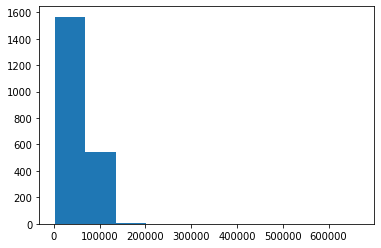

In [ ]:
# Histogram 통해 Income 분포 확인
plt.hist(cleaned_data['Income']);

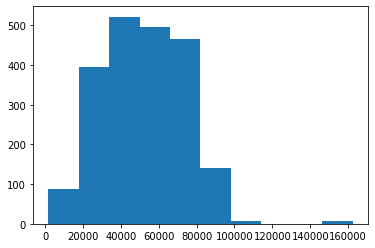

In [ ]:
# 200000 기준으로 다시 확인
plt.hist(cleaned_data.loc[cleaned_data['Income'] < 200000, 'Income']);

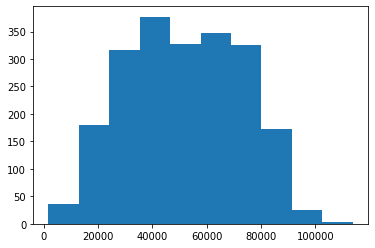

In [ ]:
# 120000 기준으로 다시 확인
plt.hist(cleaned_data.loc[cleaned_data['Income'] < 120000, 'Income']);

In [ ]:
cleaned_data.loc[cleaned_data['Income'] < 120000, 'Income'].shape[0] / len(cleaned_data)

0.996224634261444

In [ ]:
# 이상치 제거
outlier = cleaned_data.loc[cleaned_data['Income'] >= 120000, 'Income'].index

final = cleaned_data.copy()

final = final.drop(labels=outlier, axis=0).reset_index(drop=True)

final.shape

(2111, 22)

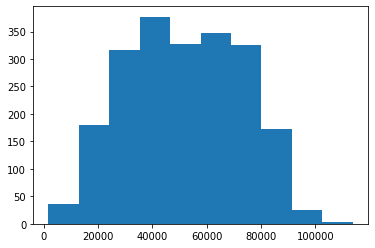

In [ ]:
plt.hist(final['Income']);

In [ ]:
final.shape[0]

2111

### **2-2. sample의 평균값과 모집단의 평균값을 비교해봅니다.**

- `seed`는 2로 지정하세요.
  - 동일한 결과값을 도출하기 위해, seed 지정 코드 하단에 이 문제에 대한 코드를 작성해주세요.
- `df_final`을 모집단으로 가정한 후, `Income` column의 평균을 구해 `mean_pop` 변수에 저장하세요.
- sample size가 5일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_5` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_5`의 평균을 뺀 값을 `diff_5`에 저장하세요.
- sample size가 200일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_200` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_200`의 평균을 뺀 값을 `diff_200`에 저장하세요.



##### **Q3. `diff_5`, `diff_200`의 결과를 각각 반올림하여 소수점 둘째 자리까지 (`diff_5`, `diff_200`)의 형태로 쓰세요.**

- 동일한 결과값을 도출하기 위해, seed 지정 코드를 반드시 실행 해야 합니다.
- 2-2 문제를 푸는데 필요한 모든 내용이 seed 지정 코드가 있는 셀에 들어가도록 코드를 작성해주세요.



In [ ]:
# for 문 각각 사용
np.random.seed(2)

# mean_pop 지정
mean_pop = final['Income'].mean()

# 5 samples bootstrapping
sample_5 = []

for _ in range(10000):
  sample5 = np.random.choice(final['Income'], 5, replace=True)
  sample_5.append(sample5.mean())

# 200 samples bootstrapping
sample_200 = []

for _ in range(10000):
  sample200 = np.random.choice(final['Income'], 200, replace=True)
  sample_200.append(sample200.mean())

# list to array
sample_5 = np.array(sample_5)
sample_200 = np.array(sample_200)

# mean pop 과의 차이 비교
diff_5 = mean_pop - sample_5.mean()
diff_200 = mean_pop - sample_200.mean()

round(diff_5, 2), round(diff_200, 2)

(101.97, 11.35)

In [ ]:
# for 문 한번 사용
np.random.seed(2)

# mean_pop 지정
mean_pop = final['Income'].mean()

# 5 samples bootstrapping
sample_5 = []

# 200 samples bootstrapping
sample_200 = []

for _ in range(10000):
  sample5 = np.random.choice(final['Income'], 5, replace=True)
  sample_5.append(sample5.mean())

  sample200 = np.random.choice(final['Income'], 200, replace=True)
  sample_200.append(sample200.mean())

# list to array
sample_5 = np.array(sample_5)
sample_200 = np.array(sample_200)

# mean pop 과의 차이 비교
diff_5 = mean_pop - sample_5.mean()
diff_200 = mean_pop - sample_200.mean()

round(diff_5, 2), round(diff_200, 2)

(98.86, 11.43)

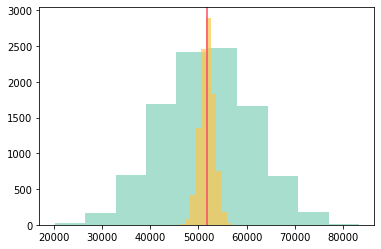

In [ ]:
plt.hist(sample_5, alpha=0.5, color='#53BF9D')
plt.hist(sample_200, alpha=0.7, color='#FFC54D')
plt.axvline(mean_pop, color='#F94C66');

### **2-3. sample의 분포를 통해 신뢰구간을 확인합니다.**
**2-2**에서 구현한 `sample_200` 표본 분포를 활용하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 찾아봅니다.



##### **Q4. 95% 신뢰구간의 lower limit과 upper limit을 각각 반올림하여 소수점 둘째 자리까지 (lower limit, upper limit)의 형태로 쓰세요.**

In [ ]:
# 2-2 정답에 따라 달라질 수 있음
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5)

round(lower, 2), round(upper, 2)

(48918.91, 54699.64)

## **Part 3. Hypothesis Test**

데이터에서 다양한 시나리오를 파악하고 옳은 가설을 세우는 것은 매우 중요합니다. 위에 우리에게 주어진 데이터셋에 대해서도 다양한 시나리오에 대해 생각해볼 수 있습니다.

주어진 데이터셋에는 자녀가 청소년인지 여부를 나타내는 `Teenhome`과 연간 수입을 나타내는 `Income` 정보가 존재하는데, 청소년 자녀가 있는 경우 자녀의 연령에 따라 증가하는 지출, 고객의 회사 내 지위 등을 고려하여 수입이 증가할 것이라는 가설을 생각해 볼 수 있습니다. 

따라서 **고객의 자녀가 청소년인지 여부에 따라 연간 수입 평균값의 차이가 있는지** 가설검정을 통해 확인해보도록 하겠습니다.

### **3-1. One-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우보다 더 많은지 가설 검증을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$





- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.


##### **Q5. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?**

**a.** $H_0$: $μ_{no} ≥ μ_{yes}\;$, $\;H_a$: $μ_{no} < μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} > μ_{yes}\;$, $\;H_a$: $μ_{no} ≤ μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$





In [ ]:
from scipy import stats

In [ ]:
yes = final.loc[final['Teenhome'] == 1, 'Income']
no = final.loc[final['Teenhome'] == 0, 'Income']

pval1 = stats.ttest_ind(yes, no, equal_var = False, alternative='greater').pvalue

round(pval1, 3)

0.051

In [ ]:
yes.mean()

52581.50354609929

##### **Q6. 다음 중 위의 가설검정 결과로 나온 p-value를 통해 도출한 결론을 고르세요 (p-value는 소수점 셋째 자리까지 계산하세요)** 

a. p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

**b. p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.**

c. p-value가 0.05보다 작으므로 귀무가설을 기각하지 못한다.

d. p-value가 0.05보다 크므로 귀무가설을 기각하고 대립가설을 채택한다.

e. p-value가 0.05보다 크므로 귀무가설과 대립가설 모두를 채택한다.

### **3-2. Two-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우와 차이가 있는지 가설검정을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$

- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.






##### **Q7. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?** 

a. $H_0$: $μ_{no} \neq\; μ_{yes}\;$, $\;H_a$: $μ_{no} = \;μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

**c.** $H_0$: $μ_{no} =\; μ_{yes}\;$, $\;H_a$: $μ_{no} \neq \;μ_{yes}$ 

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>







##### **Q8. 위의 가설 검정 결과로 나온 p-value를 반올림하여 소수점 셋째 자리까지 쓰세요.**

In [ ]:
pval2 = stats.ttest_ind(yes, no, equal_var = False).pvalue

round(pval2, 3)

0.101

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

---

#### **$\chi^2$ 가설 검정을 시행합니다**

우리가 사용할 $\chi^2$ - test는 어떤 경우에 사용하는 가설 검정 방법인지 알아봅시다.


- one sample $\chi^2$ - test (적합도 검정)
  > **주어진 하나의 범주형 변수의 분포가 특정 예상되는 분포와 동일한 분포를 나타내는지** 에 대한 가설 검정 방법

  - 귀무가설($H_0$): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
  - 대립가설($H_a$): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.

- two sample $\chi^2$ - test (독립성 검정)
  > **두 개의 범주형 변수가 서로 연관되어 있는지 여부**에 대한 가설 검정 방법

  - 귀무가설($H_0$): 변수 X와 Y는 서로 독립이다. (연관 없음)
  - 대립가설($H_a$): 변수 X와 Y는 서로 독립이 아니다. (연관 있음)

</br>

위의 가설검정 방법에 대한 설명을 참고하여 진행해봅니다.


### **4-1. one sample $\chi^2$ - test**

> XYZ사는 다국적 기업으로 다양한 나라에 고객층을 확보하고 있으며, 5월을 맞아 **기혼자를 대상으로 한 이벤트를 기획**하려고 합니다. 이때, 우리는 모든 국가를 대상으로 이벤트를 진행하는 것이 효율적인지 $\chi^2$ - test를 통해 확인해보려 합니다. 만약 국적별 기혼자의 빈도가 비슷하다면, XYZ사는 모든 국가를 대상으로 이벤트를 진행하는 것을 고려할 것이고, 그렇지 않다면, 어떤 국적의 고객이 더 많은지 파악하는 추가 분석이 필요할 것입니다.


#### **기혼자의 빈도가 모든 나라에 대해 균일한지 가설 검정을 해보세요.**

---

[공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)를 참고하여 아래에 명시된 가설을 검정해봅시다. ($\alpha$ = 0.05)
- 귀무가설($H_0$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있다.
- 대립가설($H_a$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있지 않다.

> **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다.

In [ ]:
from scipy.stats import chisquare

# 국적 - 결혼상태 crosstab 생성
country_marital = pd.crosstab(final['Country'], final['Marital_Status'])
country_marital

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Country,,,,,,,,
AUS,1,0,18,63,17,36,5,0
CA,1,3,26,94,56,62,6,1
GER,0,0,6,56,18,31,4,0
IND,0,0,10,51,35,36,4,1
ME,0,0,0,0,2,1,0,0
SA,0,0,43,103,66,91,12,0
SP,0,0,102,413,230,264,42,0
US,0,0,16,32,28,23,2,0


In [ ]:
# 기혼('Married') 상태에 해당하는 데이터만 추출
married = country_marital.loc[:,'Married']
married

Country
AUS     63
CA      94
GER     56
IND     51
ME       0
SA     103
SP     413
US      32
Name: Married, dtype: int64

In [ ]:
# 기혼자 명수 총합
married_ppl = sum(married)
married_ppl

812

In [ ]:
# 국적 수
len(final['Country'].unique())

8

In [ ]:
# 기혼('Married')에 해당하는 전체 데이터 수를 국적 수(8)으로 나눈 빈도 = 우리의 기대 분포 (국적별 빈도가 균일함)
exp = [married_ppl / 8]
exp_f = exp * 8
exp_f

[101.5, 101.5, 101.5, 101.5, 101.5, 101.5, 101.5, 101.5]

In [ ]:
# option 1) chisquare f_exp 파라미터 지정 X
stats, pvalue = chisquare(married)
pvalue

1.777339802509078e-247

In [ ]:
# option 2) 실제 분포와 기대 분포 직접 비교
stats2, pvalue2 = chisquare(married, exp_f)
pvalue2

1.777339802509078e-247

### **4-2. P-value 해석**



#### **가설검정 결과로 나온 p-value를 바탕으로 결론을 제시하세요.**

##### **Q9. p-value와 귀무가설 기각 여부를 (`p-value`, `귀무가설 기각 여부`) 형태로 쓰세요.**

- p-value는 소수점 둘째 자리까지 표시합니다.
- 귀무가설 기각 여부는 `O`, `X` 로 표시합니다.
  - `O` : 귀무가설 기각
  - `X` : 귀무가설 기각 실패

귀무가설을 바탕으로 시행한 가설 검정 결과 P-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.


> 즉, 국적별로 기혼자의 분포는 다르다고 결론지을 수 있다. 따라서 XYZ 사에서는 어떤 국적의 기혼자가 많은지 확인하는 추가 분석을 시행할 필요성이 있다. 